In [4]:
import numpy as np
from keras.datasets import mnist
from matplotlib import pyplot
from matplotlib import image

(train_X, train_y), (test_X, test_y) = mnist.load_data()

train_X.shape

(60000, 28, 28)

In [63]:
def apply_kernels(img, kernels: list):
  # Kernels should be an list of Np.arrays, representing a list of filters.
  # It is assumed that all kernels are of the same size
  # Kernel can be 2d if the image is also 2d. Otherwise it should be the same size.

  image_y = img.shape[0]
  image_x = img.shape[1]
  if (2 in img.shape):
    image_z = img.shape[2]
  else:
    image_z = 1
    img.shape = (image_y, image_x, image_z)

  kernel = kernels[0] # take the first kernel as a reference

  kernel_y = kernel.shape[0]
  kernel_x = kernel.shape[1]
  if (2 in img.shape):
    kernel_z = kernel.shape[2]
  else:
    kernel_z = 1
      # resize all 2d kernels to 3d
    for kernel in kernels: 
      kernel.shape = (kernel_y, kernel_x, kernel_z)

  # Create an empty image to store the output
  outs = [np.zeros((image_y, image_x)) for i in range(len(kernels))]

  # Create padding around the image for edge pixels where the kernel cannot be applied
  padded_image = np.pad(img, ((int(np.floor(kernel_y / 2)), int(np.floor(kernel_y / 2)) ), (int(np.floor(kernel_x / 2)), int(np.floor(kernel_x / 2))), (int(np.floor(kernel_z / 2)), int(np.floor(kernel_z / 2)))), 'edge')


  # Loop through every given kernel, and pixel of the image
  for (k, kernel) in enumerate(kernels):
    for y in range(image_y):
      for x in range(image_x):
        # Get the current region of interest
        roi = padded_image[y:y + kernel_y, x:x + kernel_x]
        # Perform element-wise multiplication between the ROI and the kernel, then sum the matrix
        outs[k][y, x] = np.sum(roi * kernel)

  return outs

  
  

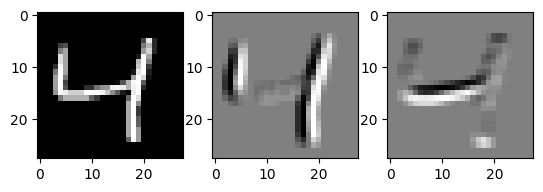

In [65]:

input_img = train_X[2] # sample image from mnist dataset
kernel_1 = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])
kernel_2 = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])
convolution_outputs = apply_kernels(input_img, [kernel_1, kernel_2])
fig, axs = pyplot.subplots(1, 3)
axs[0].imshow(input_img, cmap=pyplot.get_cmap('gray'))
axs[1].imshow(convolution_outputs[0], cmap=pyplot.get_cmap('gray'))
axs[2].imshow(convolution_outputs[1], cmap=pyplot.get_cmap('gray'))
pyplot.show()

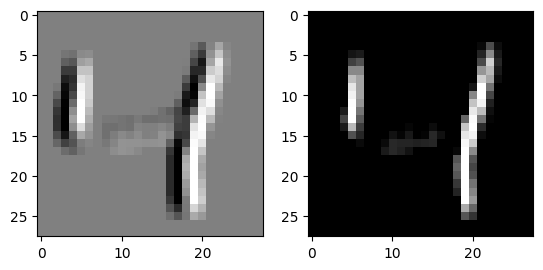

In [66]:
def relu(img):
  return np.maximum(img, 0)

relu_out = relu(convolution_outputs[0])
fig, axs = pyplot.subplots(1, 2)
axs[0].imshow(convolution_outputs[0], cmap=pyplot.get_cmap('gray'))
axs[1].imshow(relu_out, cmap=pyplot.get_cmap('gray'))
pyplot.show()

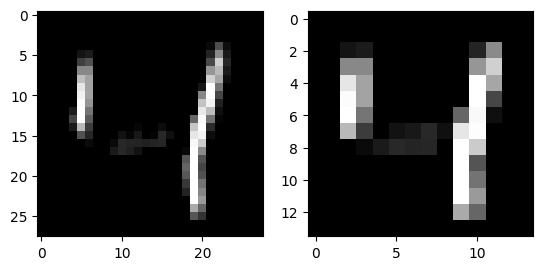

In [67]:
def maxpool(input, size):
  in_y, in_x = input.shape

  pool_y = size[0]
  pool_x = size[1]

  if (in_y % pool_y != 0 or in_x % pool_x != 0):
    # pad the input image if it is not divisible by the pool size
    input = np.pad(input, ((0, pool_y - (in_y % pool_y)), (0, pool_x - (in_x % pool_x))), 'edge')
  
  in_y, in_x = input.shape

  out = input.reshape((in_y // pool_y, pool_y, in_x // pool_x, pool_x)).max(axis=(1, 3))


  return out

start = relu_out
pool_out = maxpool(start, (2, 2))
fig, axs = pyplot.subplots(1, 2)
axs[0].imshow(start, cmap=pyplot.get_cmap('gray'))
axs[1].imshow(pool_out, cmap=pyplot.get_cmap('gray'))
pyplot.show()

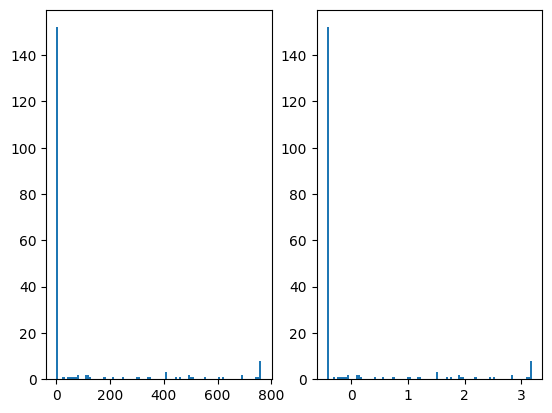

In [69]:
def normalize(input):
  # normalize to input to a standard deviation 1 and mean 0
  return (input - np.mean(input)) / np.std(input)

normalized = normalize(pool_out)
fig, axs = pyplot.subplots(1, 2)
axs[0].hist(pool_out.flatten(), bins=100)
axs[1].hist(normalized.flatten(), bins=100)
pyplot.show()

In [72]:
def fullyConnected(input, weights, outputNodes):
  input = input.flatten()
  if len(input) != weights.shape[1]:
    raise Exception("Input and weights must be the same size")
  if weights.shape[0] != outputNodes:
    raise Exception("Weights and outputNodes must be the same size")
  output = np.zeros(outputNodes)
  for n in range(0, outputNodes):
    output[n] = np.sum(input * weights[n])
  return output


fc_out = fullyConnected(np.array([1, 2, 3]), np.array([[1, 2, 3], [4, 5, 6]]), 2)
print(fc_out)

[14. 32.]


In [71]:
def softmax(input):
  return np.exp(input) / np.sum(np.exp(input), axis=0)

softmax(fc_out)

array([1.52299795e-08, 9.99999985e-01])